# 배달시간대 시각화를 해봅시다

In [32]:
# 모듈설치 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['font.family'] = font_name
plt.rc('font', family='Malgun Gothic')


import warnings
warnings.filterwarnings("ignore")

In [19]:
# 데이터 불러오기

df = pd.read_excel('./data/delivery/재환배달데이터.xlsx')
df.drop(df[['Unnamed: 0', 'Unnamed: 0.1','날짜','시','구','평균시간','평균주문금액','5세단위구분','총인구수','남성인구수','여성인구수']], axis=1, inplace=True)
display(df.head())

,시간,주문건수,시간범주
0,0,16,야식
1,1,6,야식
2,9,3,주간
3,10,21,주간
4,11,73,주간


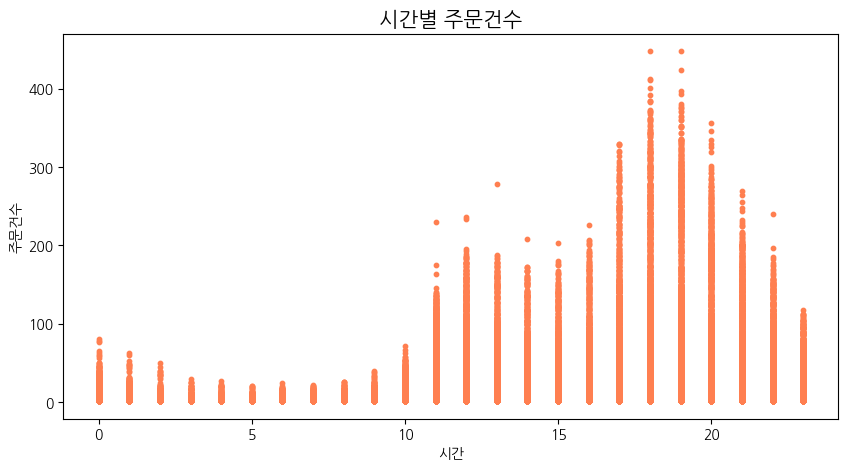

In [3]:
# 시간범주를 산점도로 그려보자

plt.style.use('default')
df.plot(kind='scatter', x='시간', y='주문건수', c='coral', s=10, figsize=(10,5))
plt.title("시간별 주문건수", size=15)

plt.show()


<class 'matplotlib.axes._subplots.AxesSubplot'>


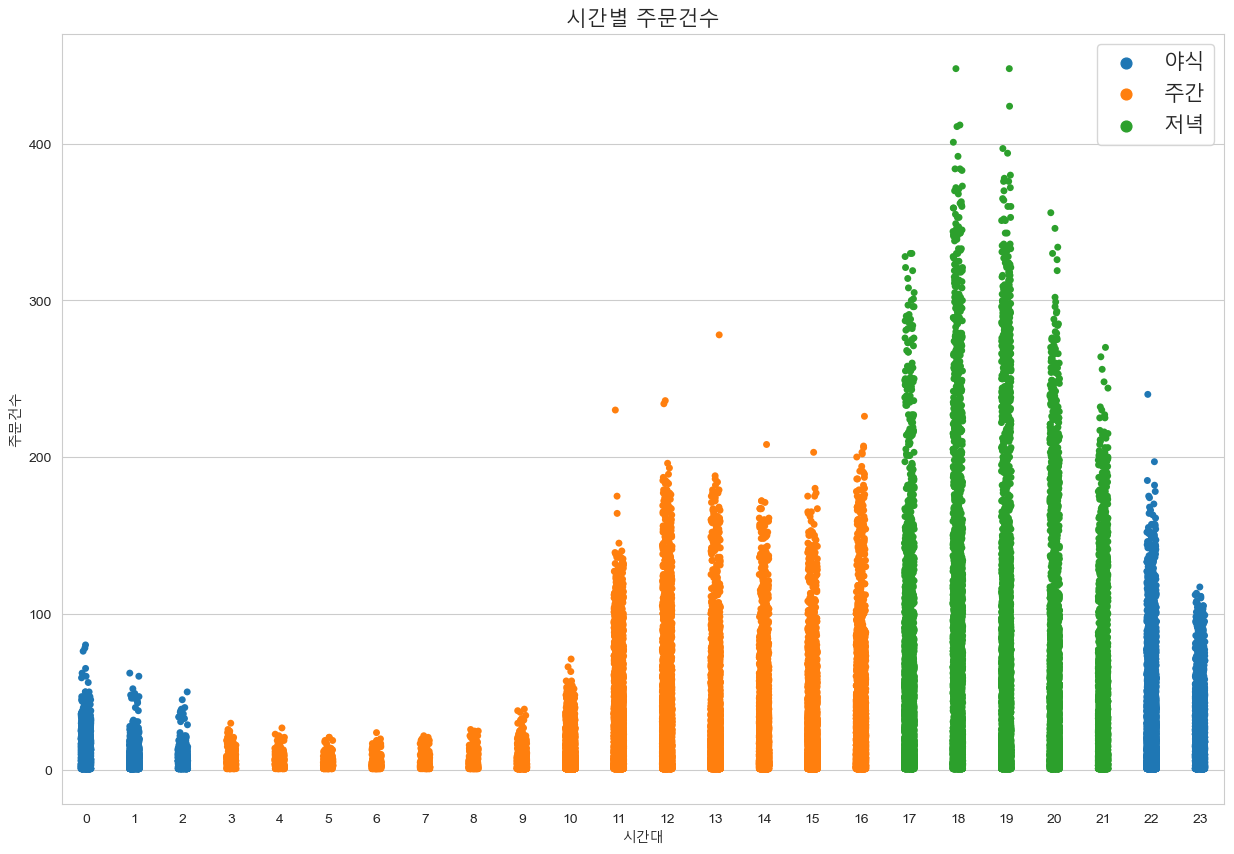

In [31]:
# 범주형 그래프로 그려보자

sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
graph1 = sns.stripplot(x='시간', y='주문건수', hue='시간범주', data=df)
print(type(graph1))
# plt.legend(fontproperties=font_name)
plt.title("시간별 주문건수", size=15, fontproperties=font_name) # seaborn에서 한글이 깨진다면 이렇게 각각 fontproperties를 설정해줘야 함
plt.xlabel("시간대", fontproperties=font_name)
plt.ylabel("주문건수", fontproperties=font_name)
plt.legend(prop={'family':font_name, 'size':15})

plt.savefig('./data/시간별주문건수_strip.png', bbox_inches='tight')

plt.show()



In [26]:
matplotlib.axes._subplots.AxesSubplot?

Object `matplotlib.axes._subplots.AxesSubplot` not found.


<Figure size 1500x1500 with 0 Axes>

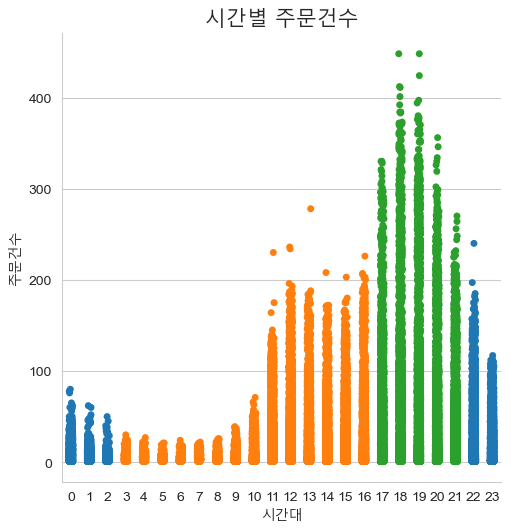

In [28]:
# catplot 그래프로 그려보자

sns.set_style('whitegrid')
plt.figure(figsize=(15,15))
graph2 = sns.catplot(x='시간', y='주문건수', hue='시간범주', data=df)
plt.title("시간별 주문건수", size=15, fontproperties=font_name) # seaborn에서 한글이 깨진다면 이렇게 각각 fontproperties를 설정해줘야 함
plt.xlabel("시간대", fontproperties=font_name)
plt.ylabel("주문건수", fontproperties=font_name)
graph2._legend.remove()
plt.savefig('./data/시간별주문건수.png', bbox_inches='tight')

plt.show()



In [27]:
plt.savefig?

Signature: plt.savefig(*args, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has no exten